# $$Regressão~Logistica~Binária$$

### $$Conceito:$$

A **regressão logística** é um modelo estatístico que permite estimar a chance da ocorrência de um determinado desfecho categórico (Y) em função de um ou mais preditores (X), que podem ser contínuos ou categóricos. Quando a variável dependente apresenta apenas dois níveis ou classes, a regressão é chamada de binária. Quando há mais níveis ou classes, é chamada de multinomial


Na **regressão logística**  nós não conhecemos a probabilidade p como é o padrão nos problemas de distribuição de Bernoulli. Logo, o objetivo do modelo logístico é estimar (p) para uma combinação linear das variáveis independentes



__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## $$Objetivo:$$  

## $$Criar~Modelo~ de ~Regressão~ Logistica ~Binária$$

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [1]:
#Pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

# Banco de dados 

In [2]:
# Carregando o dataset
dados = pd.read_csv('Atrasado.csv',encoding='latin1',sep=',')
dados = dados.set_index('estudante')
dados


,atrasado,dist,sem
estudante,,,
Gabriela,0,12.5,7
Patrícia,0,13.3,10
Gustavo,0,13.4,8
Letícia,0,23.5,7
Luiz Ovídio,0,9.5,8
...,...,...,...
Sheila,1,24.0,10
Pedro,1,10.0,10
Horácio,1,9.4,10


**Tabela com 100 observações e 3 variáveis**

# $$Dicionário~ de~ Dados~ das~ Variáveis$$ 

### **$$Variáveis:$$**

**estudante:** Nome do estudante


**atrasado:** Variável Target, 0 para o estudante que não chegou atrasado e 1 para estudante que chegou atrasado
    
    
**dist:** Distância da casa do estudante até a escola em KM


**sem:** Quantidade de semáfaros até chegar na escola


# Análise Exploratória

In [3]:
#Info da tabela
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, Gabriela to Estela
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   atrasado  100 non-null    int64  
 1   dist      100 non-null    float64
 2   sem       100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.1+ KB


**São 3 variáveis quantitativas, sendo a variável resposta dicotômica**


In [4]:
#Descrição dos dados
dados.describe()

,atrasado,dist,sem
count,100.000000,100.000000,100.000000
mean,0.590000,14.073000,10.210000
std,0.494311,4.330112,1.578229
min,0.000000,1.000000,5.000000
25%,0.000000,12.000000,10.000000
50%,1.000000,13.350000,10.000000
75%,1.000000,16.125000,10.000000
max,1.000000,29.000000,18.000000



**Obs: Não existe análise quantitativa para variáveis dicotômica ou policotômicas (Variável Target)**


In [5]:
#tabela de frequencia da var Y
dados.atrasado.value_counts()

1    59
0    41
Name: atrasado, dtype: int64

**A Variável Y não precisa estar balanceada na regressao logistica**


# Modelagem:

In [6]:
#Separar os dados em X e Y

x = dados.iloc[:,1:3]
y= dados.iloc[:,0]

## Modelo - Regressão Logistica

In [7]:
#Modelo 
import statsmodels.api as sm

# Somente o Intercept
x_interc = sm.add_constant(x) 

# funçao com os 2 coeficientes
modelo = sm.Logit(y,x_interc) 

# Treinar o modelo
modelo_fit = modelo.fit() 

# Verificar os dados do modelo
modelo_fit.summary() 


Optimization terminated successfully.
         Current function value: 0.504664
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               atrasado   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.2544
Time:                        09:07:56   Log-Likelihood:                -50.466
converged:                       True   LL-Null:                       -67.686
Covariance Type:            nonrobust   LLR p-value:                 3.324e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.1665      8.442     -3.100      0.002     -42.713      -9.620
dist           0.1904      0.076      2.493      0.013       0.041       0.340
sem            2.3629      0.795      2.972      0.003       0.804       3.921
==============================================================================
"""

- **Não existe R² quando a variáveis target for qualitativa**


- **Variável Target qualitativa não gera p_values da estatística T e sim da estatística Z (normal padronizada), pois ao estimar varios modelos, os dados regridem ao uma normal padrão**




# Encontrar os parâmetros dos modelos

## Logito

**Logito:** É formula da regressão linear (alpha + beta1 * x1 + beta2 * x2 .....), porém no formato de logaritmo (Y categorica), quanto mais proximo de 0 é o logito mais indeciso vai ser para classificar o evento, probabilidade proxima de 50% para evento e não evento

In [8]:
#Logito

a = modelo_fit.params[0]
b1 = modelo_fit.params[1]
b2 = modelo_fit.params[2]

dados['Logito'] = a +b1*x['dist']+b2*x['sem']
dados

#OU 

# modelo_fit.fittedvalues

,atrasado,dist,sem,Logito
estudante,,,,
Gabriela,0,12.5,7,-7.246693
Patrícia,0,13.3,10,-0.005755
Gustavo,0,13.4,8,-4.712476
Letícia,0,23.5,7,-5.152567
Luiz Ovídio,0,9.5,8,-5.454939
...,...,...,...,...
Sheila,1,24.0,10,2.031259
Pedro,1,10.0,10,-0.633993
Horácio,1,9.4,10,-0.748218


In [9]:
# Maximo e minimo do logito

mini = dados.Logito.min()
maxi = dados.Logito.max()

print(f'Minimo valor do logito: {mini}\n')
print(f'Maximo valor do logito: {maxi}')

Minimo valor do logito: -11.877263632801354

Maximo valor do logito: 18.459416708215077


**Note que o valor do logito fica entre -11 a 18**

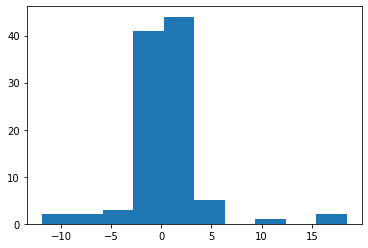

In [10]:
#Plot do logito
plt.hist(dados.Logito);

**Veja que a maioria dos valores do logito fica aproximadamente no 0, isso quer dizer que a maior parte dos dados a probabilidade de ocorrencia do evento ficará proxima do 50%**

## Probabilidade

- Transformar o valor do logito em porcentagem

In [11]:
#Probabilidade

dados['Prob_Evento'] = 1/(1+np.exp(-dados['Logito']))
dados['Prob_Nao_Evento'] = 1-(1/(1+np.exp(-dados['Logito'])))
dados

#Ou

# modelo_fit.predict(x_interc)

,atrasado,dist,sem,Logito,Prob_Evento,Prob_Nao_Evento
estudante,,,,,,
Gabriela,0,12.5,7,-7.246693,0.000712,0.999288
Patrícia,0,13.3,10,-0.005755,0.498561,0.501439
Gustavo,0,13.4,8,-4.712476,0.008903,0.991097
Letícia,0,23.5,7,-5.152567,0.005751,0.994249
Luiz Ovídio,0,9.5,8,-5.454939,0.004257,0.995743
...,...,...,...,...,...,...
Sheila,1,24.0,10,2.031259,0.884040,0.115960
Pedro,1,10.0,10,-0.633993,0.346606,0.653394
Horácio,1,9.4,10,-0.748218,0.321210,0.678790


**Transforma o Logito em probabilidade entre 0 e 1**

## Log-likelihood(Verossimilhança)

- Quanto mais próximo a probabilidade estiver dos extremos (0 ou 1) e da previsão correta, menor vai ser o loglike, e quanto menor o loglike melhor o modelo



In [12]:
#Loglike

dados['loglike']  = (y *np.log(dados['Prob_Evento']))+((1-y)*np.log(1-dados['Prob_Evento']))
dados

,atrasado,dist,sem,Logito,Prob_Evento,Prob_Nao_Evento,loglike
estudante,,,,,,,
Gabriela,0,12.5,7,-7.246693,0.000712,0.999288,-0.000712
Patrícia,0,13.3,10,-0.005755,0.498561,0.501439,-0.690274
Gustavo,0,13.4,8,-4.712476,0.008903,0.991097,-0.008942
Letícia,0,23.5,7,-5.152567,0.005751,0.994249,-0.005768
Luiz Ovídio,0,9.5,8,-5.454939,0.004257,0.995743,-0.004266
...,...,...,...,...,...,...,...
Sheila,1,24.0,10,2.031259,0.884040,0.115960,-0.123253
Pedro,1,10.0,10,-0.633993,0.346606,0.653394,-1.059567
Horácio,1,9.4,10,-0.748218,0.321210,0.678790,-1.135661


**Quanto mais próximo as probabilidades estiverem dos extremos (0 ou 1) e a previsão estiver correta, menor vai ser o valor do loglike**

In [13]:
# Maximo e minimo do Loglike

mini = dados.loglike.min()
maxi = dados.loglike.max()

print(f'Minimo valor do loglike: {mini}\n')
print(f'Maximo valor do loglike: {maxi}')

Minimo valor do loglike: -2.5700092713213407

Maximo valor do loglike: -9.620046694445935e-09


**Observe que o maior erro do modelo foi valor do loglike = - 2**

In [14]:
#Filtrar loglike -2 
dados[dados.loglike<-2]

,atrasado,dist,sem,Logito,Prob_Evento,Prob_Nao_Evento,loglike
estudante,,,,,,,
Rodrigo,0,11.0,11,1.919262,0.872056,0.127944,-2.056163
Raquel,0,14.0,11,2.490387,0.923465,0.076535,-2.570009


**Note que para o loglike ter um valor negativo alto, a probabilidade do evento tem que ser alto, porém com erro na previsão**

### Threshold (Converter probabilidade em Classe , definindo um ponto de corte)

In [15]:
#Threshold 
THRESHOLD = 0.5

dados['y_chapeu'] = np.where(dados.iloc[:,4] >= 0.5, 1, 0)
dados

,atrasado,dist,sem,Logito,Prob_Evento,Prob_Nao_Evento,loglike,y_chapeu
estudante,,,,,,,,
Gabriela,0,12.5,7,-7.246693,0.000712,0.999288,-0.000712,0
Patrícia,0,13.3,10,-0.005755,0.498561,0.501439,-0.690274,0
Gustavo,0,13.4,8,-4.712476,0.008903,0.991097,-0.008942,0
Letícia,0,23.5,7,-5.152567,0.005751,0.994249,-0.005768,0
Luiz Ovídio,0,9.5,8,-5.454939,0.004257,0.995743,-0.004266,0
...,...,...,...,...,...,...,...,...
Sheila,1,24.0,10,2.031259,0.884040,0.115960,-0.123253,1
Pedro,1,10.0,10,-0.633993,0.346606,0.653394,-1.059567,0
Horácio,1,9.4,10,-0.748218,0.321210,0.678790,-1.135661,0


**Definindo um valor de Threshold, convertemos a probabilidade em evento ou não evento**

**OBS: Dependendo do valor da escolha do Threshold, pode mudar o número de acertos e erros do modelo**

# Parâmetros do modelo:

## Teste Chi² - Avaliar se pelo menos um beta tem significância estatística



- **Objetivo:** Avaliar se pelo menos um beta tem significância estatística para explicar a existência do modelo


- Teste igual ao teste F na Regressao linear


- Na regressao logistica a distribuição do Logito tende a uma distribuição normal, portanto para ver se os parâmetros sao estatisticamente significantes o p_value vai ser dado através da estatística Z scores


- **Parâmetros:**
    - **LLo** = Log-Likelihood do modelo criado somente com o parâmetro alpha
    - **LLm** = Log-Likelihood do modelo criado com todos os parâmetros
    - **Chi²** = -2 (LLo - LLm)


- **Resultado:**
    - **p_value > 0.05, não rejeita a hipótese nula, betas não tem significância estatística no modelo**
    - **p_value < 0.05, rejeita a hipótese nula, betas tem significância estatística no modelo**


In [16]:
#LLo = Criar um modelo somente com o parâmetro alpha

# Somente a constante = 1
x_interc = sm.add_constant(x.values)[:,0] 

#Criar o modelo
modelo2 = sm.Logit(y,x_interc) 

# Treinar o modelo
LLo = modelo2.fit() 

# Log-Likelihood: Max Verossimilhança
LLo.llf

Optimization terminated successfully.
         Current function value: 0.676859
         Iterations 4


-67.68585467349509

**Valor do Loglike somente com o parâmetro alpha, vamos subtrair do loglike do modelo já calculado com todas as variáveis**

In [17]:
#Chi²
chi2 = -2*(LLo.llf -modelo_fit.llf )

#p_value do teste chi²
modelo_fit.llr_pvalue

3.3241220793437914e-08

**p_value < 0.05, rejeita a hipótese nula, pelo menos 1 beta tem significância estatística para o modelo**

## AIC e BIC para comparar os modelos (igual ao R² Ajustado)

- **Parâmetros:**
    - **AIC** = Comparar os modelos, igual ao R² ajustado
    - **LLm** = Log-Likelihood do modelo criado com todos os parâmetros
    - **k** = Numero de parâmetros incluindo o alpha


In [18]:
#AIC

#Parametros:

#llf
LLm = modelo_fit.llf

#k
k = len(modelo_fit.params)

#Modelo AIC
AIC = -2*(LLm)+2*k

#OU 

modelo_fit.aic

106.93275908379736

**O modelo com menor valor do AIC é o modelo que se ajustou melhor aos dados**

In [19]:
#BIC 

#Parametros:

#llf
LLm = LLm = modelo_fit.llf

#t
t = len(dados.loglike)

#Modelo BIC
BIC = -2*(LLm)+3*np.log(t)

#OU 

modelo_fit.bic

114.74826964176164

**Análogo a métrica AIC**

# Pseudo R² mcfadden

- Para comparar modelos , apensar do nome, a interpretação não é igual ao R² da regressao linear

In [20]:
# Pseudo R² mcfadden 

# LLo = Log-Likelihood do modelo so com o alpha
LLo = LLo.llf

# LLm = Log-Likelihood com todos os parâmetros 
LLm = modelo_fit.llf

#Criar parâmetro 
mf = ((-2*LLo)-(-2*LLm))/(-2*LLo)
mf



0.2544028617893678

**Quanto maior o valor do Pseudo R² melhor o modelo**

# Avaliação do Modelo

## Matriz de confusão

- É um tabela que mostra as frequências de classificação para cada classe do modelo

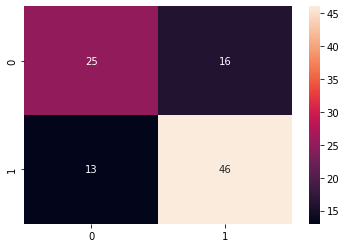

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y,dados['y_chapeu'])
sns.heatmap(cm,annot=True,fmt='d');

**Visão geral de todas as métricas**

## Acurácia

In [22]:
#Acuracia
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y,dados['y_chapeu'])
print(f'Acuracia: {acuracia*100:.1f}%')

Acuracia: 71.0%


**Total de acertos do modelo em porcentagem**

## Recall(Sensitividade)

In [23]:
#Recall(Sensitividade)
from sklearn.metrics import recall_score
recall = recall_score(y,dados['y_chapeu'])
print(f'recall: {recall*100:.1f}%')

recall: 78.0%


**Taxa de acerto dos verdadeiros positivos**

## Specificity

In [24]:
# specificity 
tn, fp, fn, tp = confusion_matrix(y,dados['y_chapeu']).ravel()
specificity = tn / (tn+fp)
print(f'specificity: {specificity*100:.1f}%')

specificity: 61.0%


**Taxa de acerto dos verdadeiros Negativos**

## Precisão

In [25]:
from sklearn.metrics import precision_score
precision = precision_score(y, dados["y_chapeu"])
print(f'Precision: {precision*100:.1f}%')

Precision: 74.2%


**Dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas**

## Curva ROC

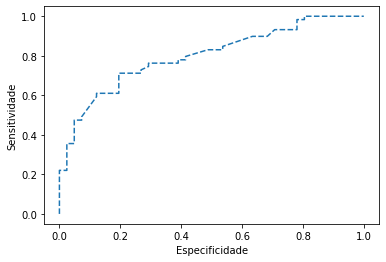

In [26]:
#Grafico
from sklearn import metrics
roc_fpr,roc_tpr,cutoff=metrics.roc_curve(y,dados["Prob_Evento"])
plt.plot(roc_fpr,roc_tpr,linestyle='--')


plt.xlabel('Especificidade')
plt.ylabel('Sensitividade');

**Cada ponto em azul determina o cutoff do modelo**

## Cut-off

- É o ponto de corte da probabilidade do evento ocorrer ou não

In [27]:
#Tabela da curva Roc
roc_tab = pd.DataFrame(1-roc_fpr,columns=['Especificidade'])
roc_tab['Sensitividade'] = roc_tpr
roc_tab['Cutoff']= cutoff
roc_tab.iloc[1:,:].head()

,Especificidade,Sensitividade,Cutoff
1,1.00000,0.016949,1.000000
2,1.00000,0.101695,0.991348
3,1.00000,0.135593,0.982249
4,1.00000,0.220339,0.926113
5,0.97561,0.220339,0.923465


**Observamos na tabela, que dependendo do ponto de corte, os acertos e erros do modelo vão ser totalmente diferentes**

## Auc e Gini

- **AUC** = Área abaixo da curva ROC(Área total do gráfico), vai de 0 a 1, quanto maior o valor, melhor o modelo 


- **GINI** = Área abaixo da curva ROC(metade da área do gráfico), vai de 0 a 1, quanto maior o valor, melhor o modelo


In [28]:
#Calculo
from sklearn.metrics import roc_curve, roc_auc_score
roc_score = roc_auc_score(y,dados["Prob_Evento"]);
print(f'AUC: {roc_score*100:.2f}%')
gini =(roc_score-0.5) /0.5
print(f'GINI: {gini*100:.2f}%')

AUC: 79.89%
GINI: 59.78%


# Conclusão

**Para modelos logísticos usamos como a principal métrica o Log-likelihood, com ele conseguimos determinar o melhor modelo, temos várias outras metricas que podem auxiliar no modelo, porém para conseguir o melhor ajuste nos dados, a inclusão de variáveis estatisticamente significantes é a única maneira de chegar no melhor fit, além é claro de escolher o modelo correto de acordo com a distribuição dos dados**